# 예제: Titanic survior

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# missingno 패키지가 없는 경우 설치
# conda install conda-forge missingno
import missingno as msno
import warnings

import os

## 데이터셋 Load

In [3]:
# 운영체제에서 파일 확인
os.listdir('./data')

['202410_202410_연령별인구현황_월간.csv',
 '202410_202410_연령별인구현황_월간.xlsx',
 'auto-mpg.csv',
 'gender_submission.csv',
 'test.csv',
 'train.csv',
 '시도별 전출입 인구수.xlsx',
 '연령별_인구현황.csv',
 '연령별_인구현황.xlsx',
 '코로나바이러스감염증-19_확진환자_발생현황_230904_최종v2.xlsx']

In [4]:
# 데이터셋 로드
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_submit = pd.read_csv('./data/gender_submission.csv')

## 데이터셋 확인

In [5]:
# 데이터셋 크기 확인
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [6]:
# 훈련 데이터셋 컬럼 확인
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# ender_submission 데이터셋 컬럼 확인
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [18]:
df_train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Null 데이터 체크

In [15]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [16]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

<Axes: >

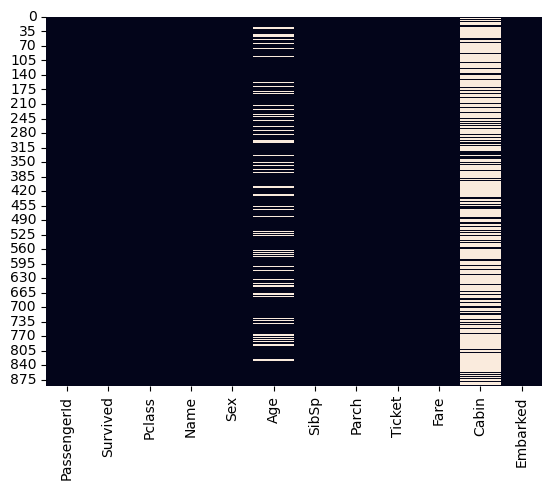

In [17]:
# Seaborn으로 결측치의 시각적 확인
sns.heatmap(df_train.isnull(), cbar=False)

#### missingno 라이브러리로 확인

<Axes: >

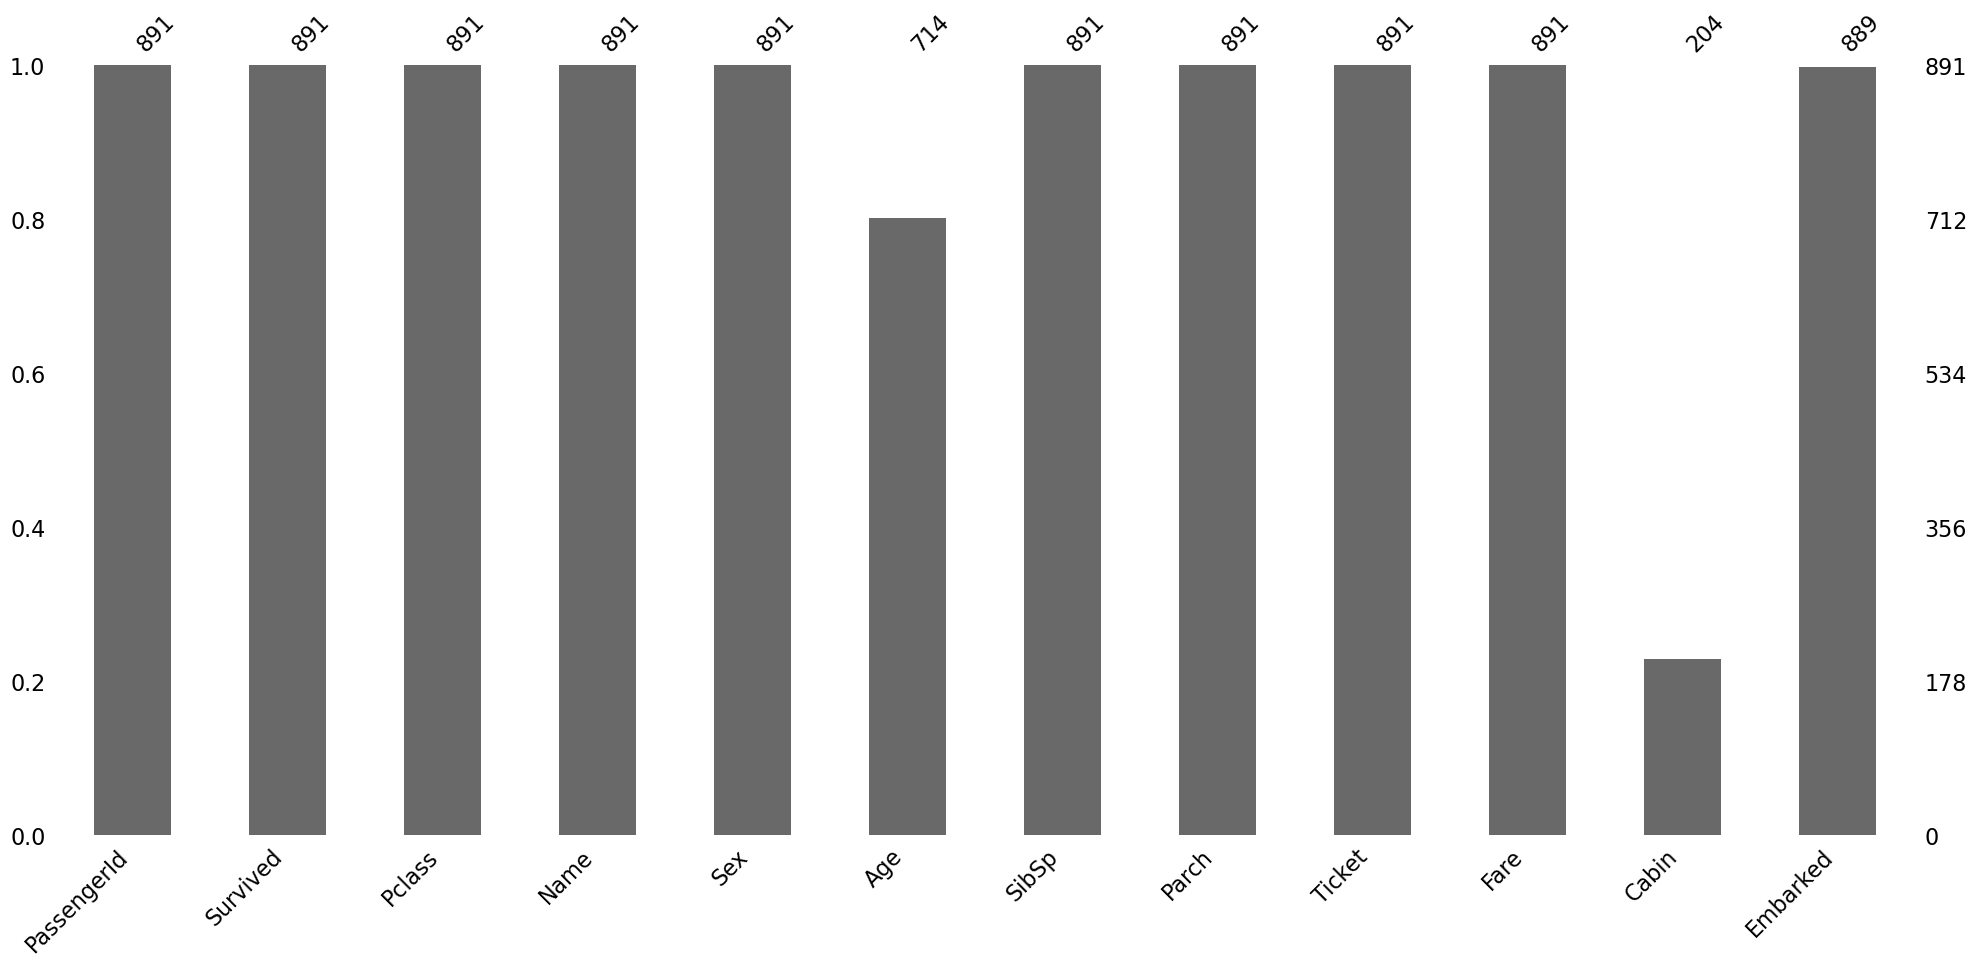

In [5]:
msno.bar(df_train)

c:\Users\gik_k\anaconda3\Lib\site-packages\missingno\missingno.py:257: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n*len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

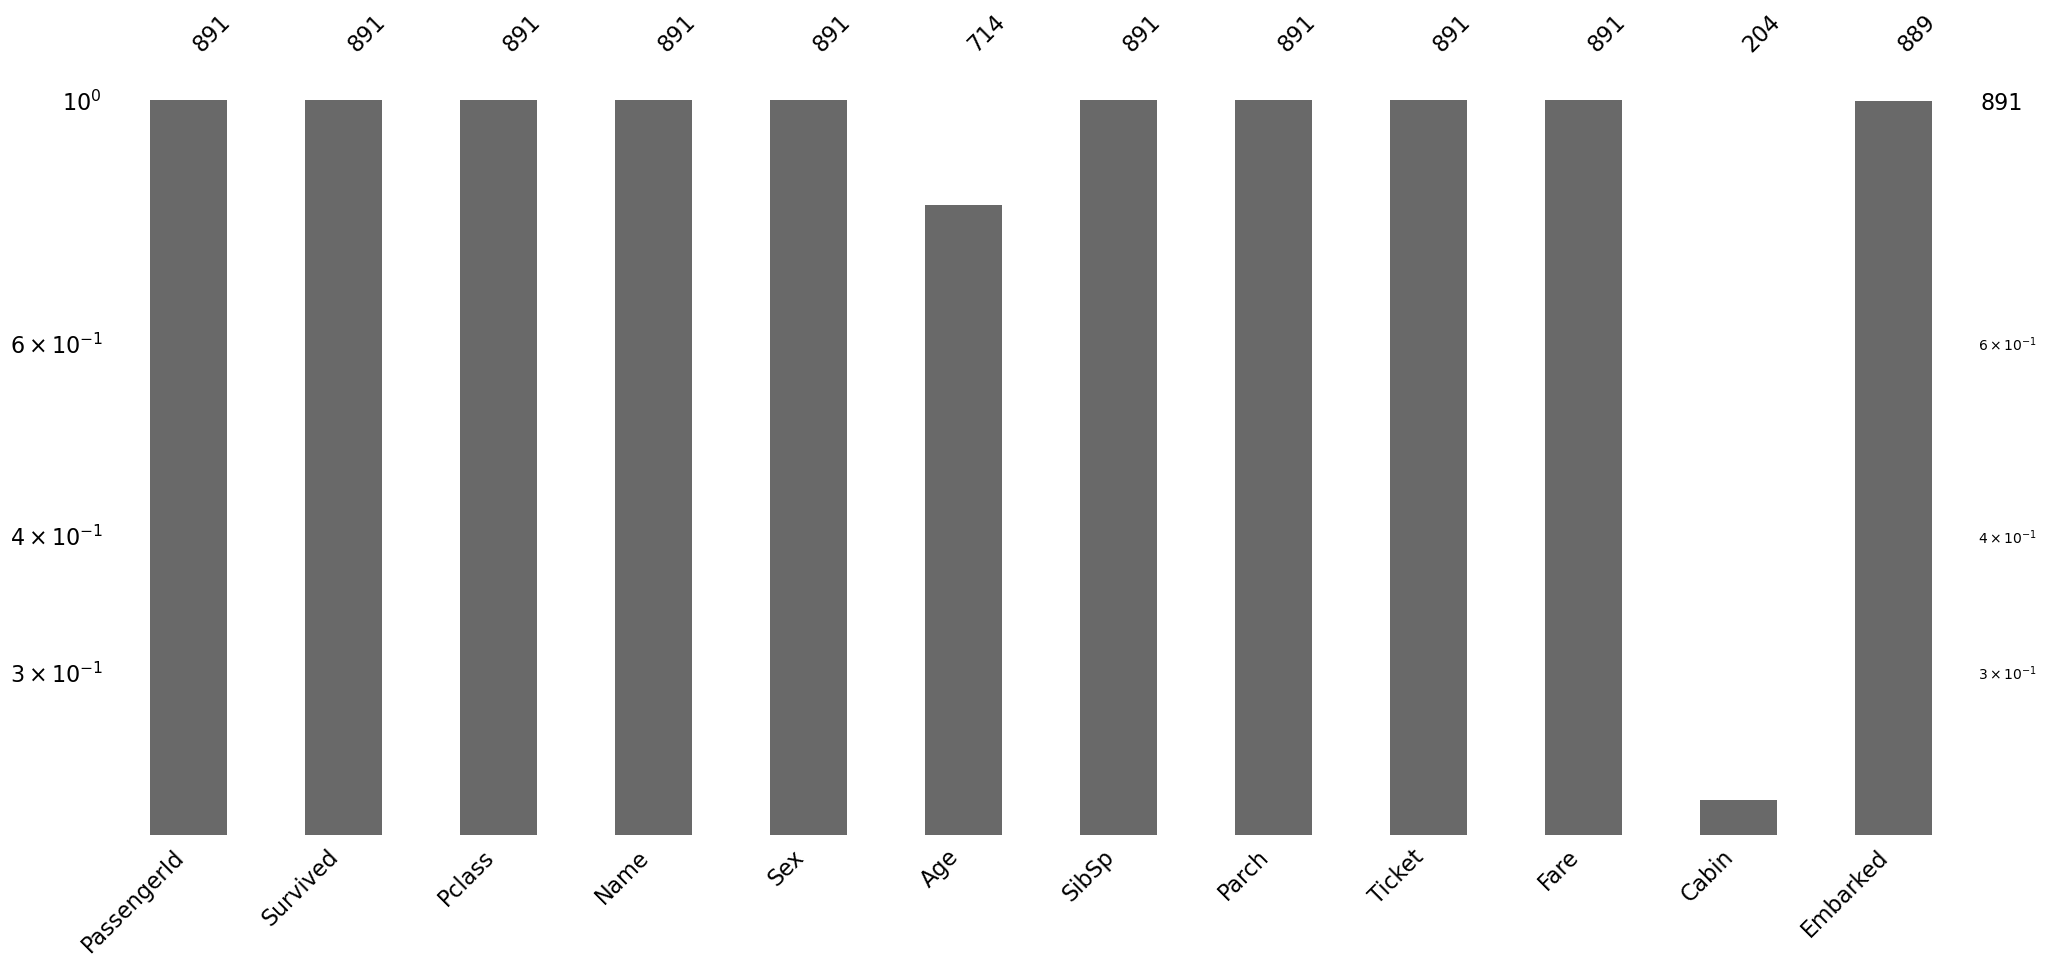

In [6]:
msno.bar(df_train,log=True)

<Axes: >

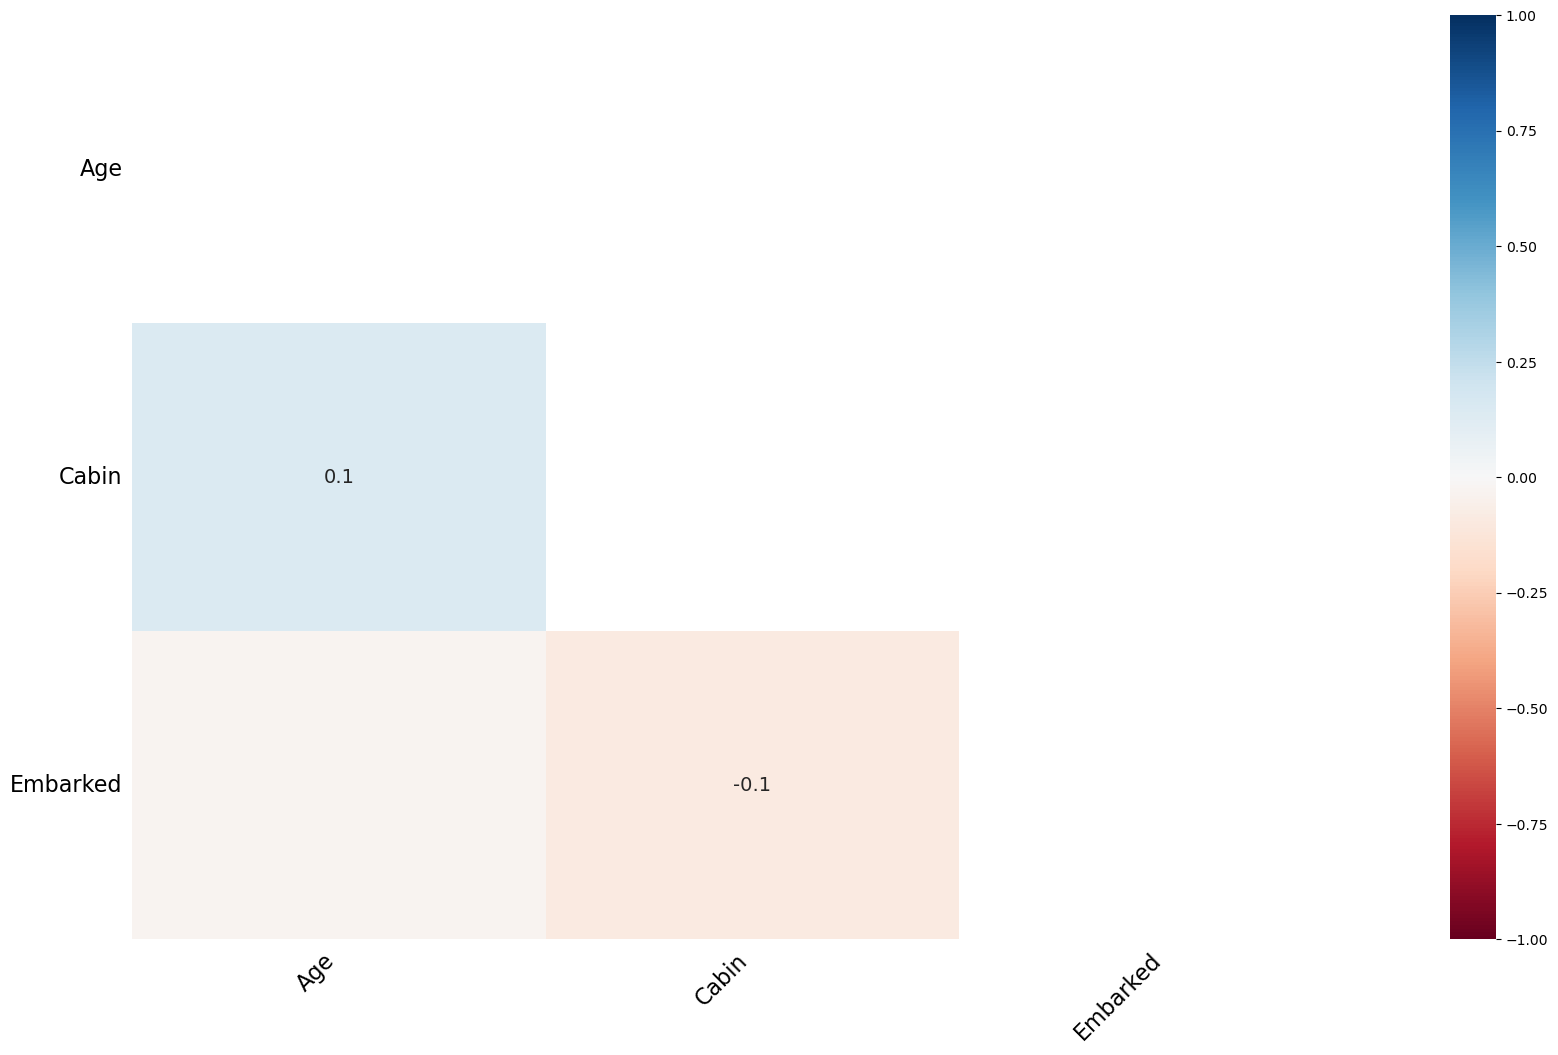

In [7]:
msno.heatmap(df_train)

## Target label 확인

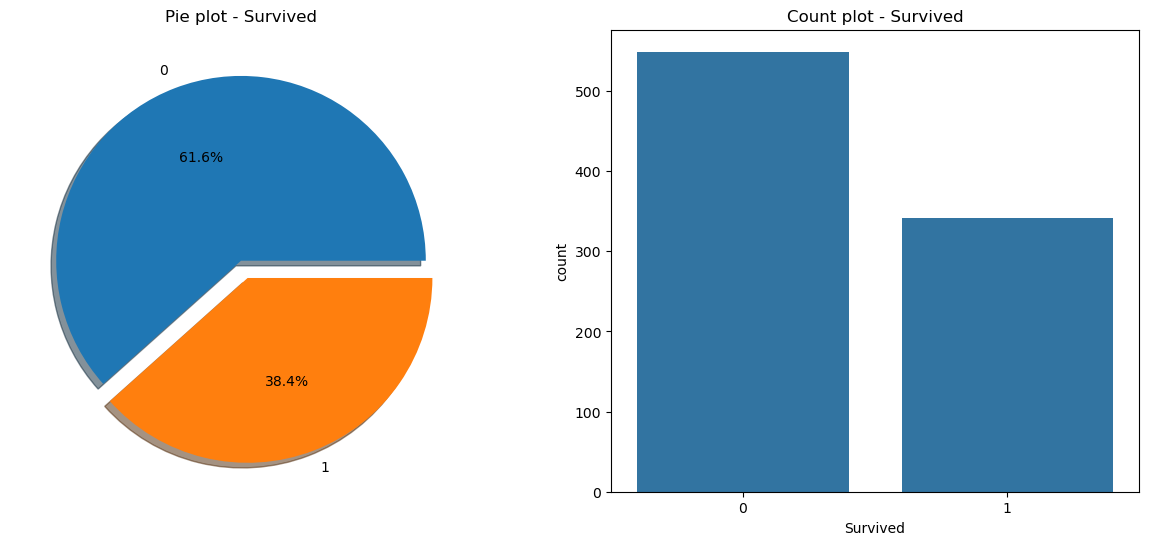

In [ ]:
# target label (Survived) 분포 확인
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


## EDA

### Pclass
* Pclass는 ordinal, 서수형 데이터입니다. 즉 카테고리이면서, 순서가 있는 데이터 타입입니다.
* 먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 group by를 사용하면 쉽게 할 수 있습니다. 또한 pivot이라는 메소드도 있습니다.

* Pclass, Survived를 가져온 후, pclass로 묶습니다. 그러고 나면 pclass마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass별 생존률이 나옵니다.
* 아래와 같이 count()를 하면, 각 class에 몇 명이 있는지 확인할 수 있으며, 216명 중 생존한 사람의 총합을 주게 됩니다.


#### pclass별 생존자수

In [20]:
# Pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
# Pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
# 위와 같은 작업을 crosstab으로 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### pclass별 생존율을 구하기 위해 groupby를 사용하여 평균을 구함

In [23]:
# mean은 생존율을 구하게 할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

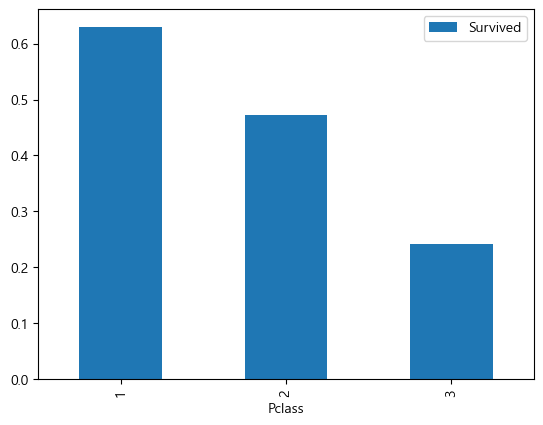

In [ ]:
# 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

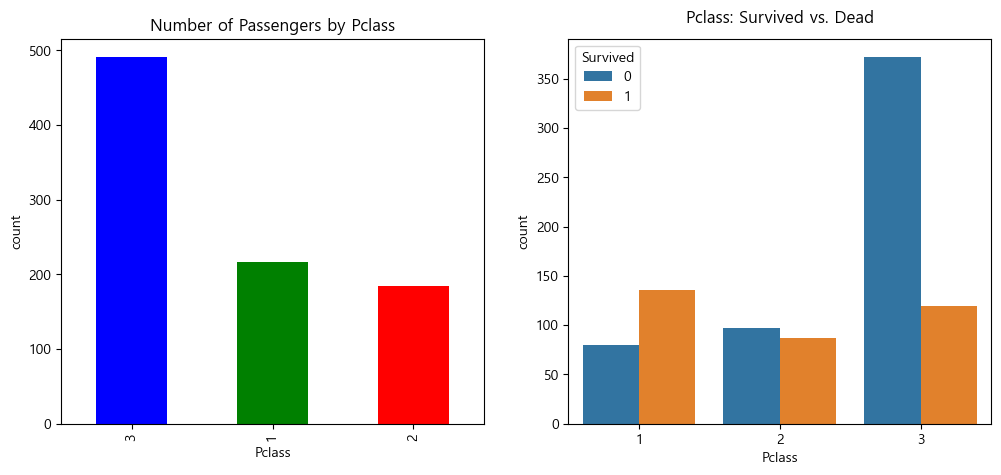

In [28]:
# countplot을 사용하여 특정 label에 따른 개수 확인
y_position = 1.02
fig, ax = plt.subplots(1, 2, figsize=(12,5))

df_train['Pclass'].value_counts().plot.bar(color=['blue', 'green', 'red'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)

plt.show()

#### 판단

* 클래스가 높을 수록 생존 확률이 높은 것을 확인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다.
* 생존에 Pclass가 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.


### 성별

#### pandas groupby와 seabon countplot을 사용해서 시각화

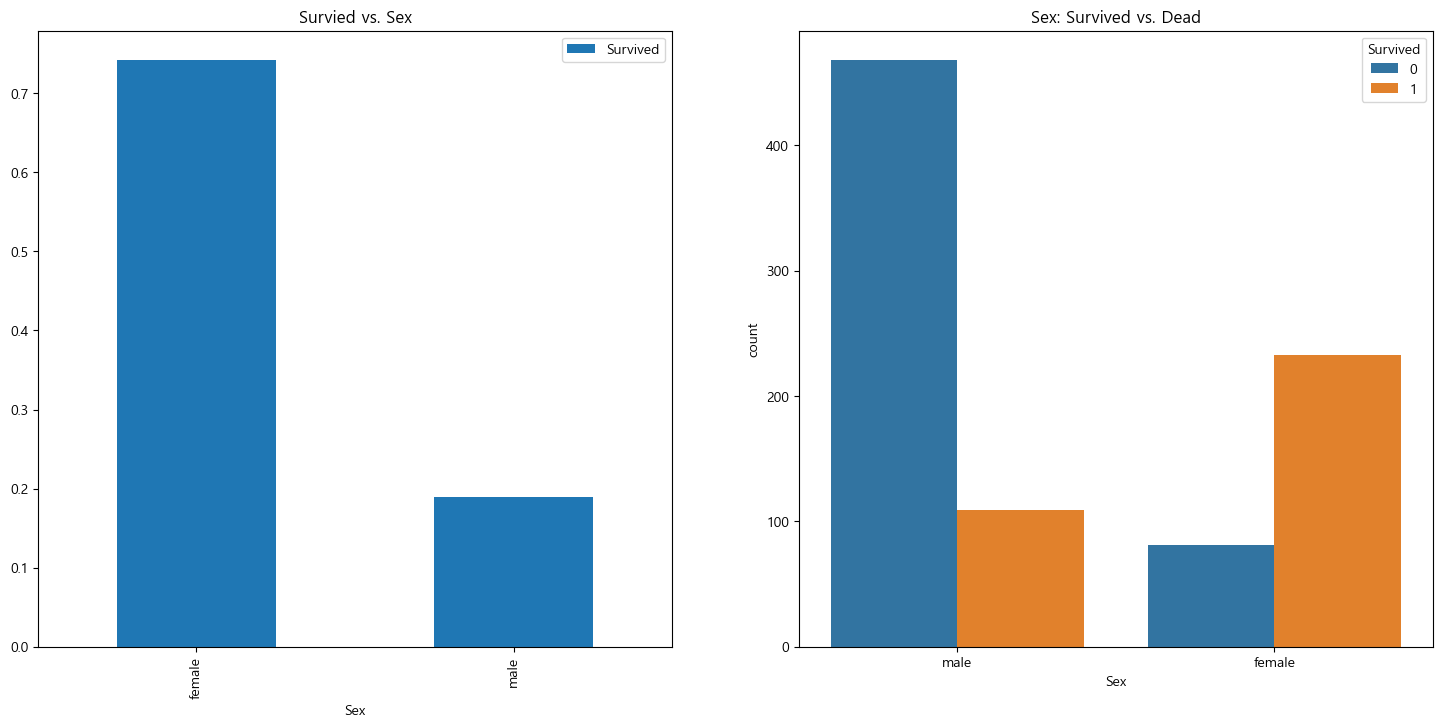

In [30]:
# Pandas groupby와 seaborn countplot을 사용하여 시각화
fig, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survied vs. Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

In [31]:
# Pandas groupby를 사용하여 성별 생존 확률 확인
df_train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [32]:
# Pandas crosstab을 사용하여 한 화면에서 확인
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 판단
* 여성이 생존할 확률이 높음
* sex 역시 예측 모델을 만들 경우 중요한 feature가 됨을 알 수 있음

### 나이

In [50]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


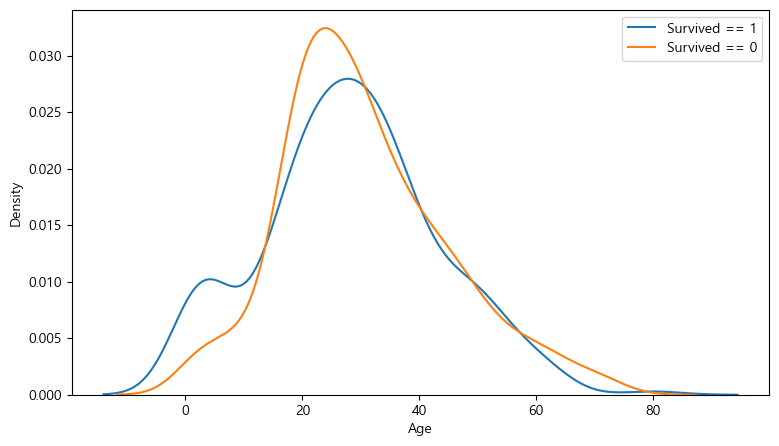

In [51]:
# 생존자의 나이에 따른 히스토그램
fig, ax = plt.subplots(1,1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()


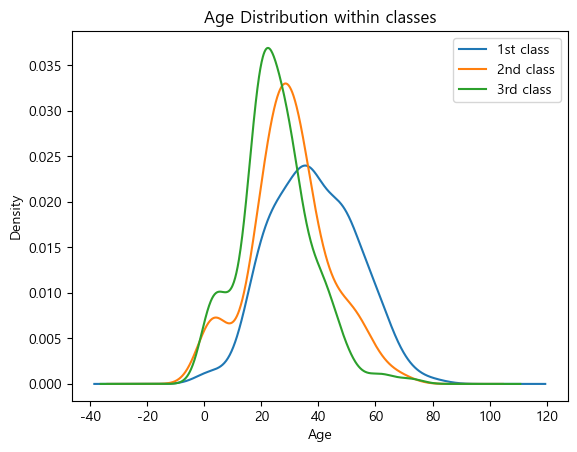

In [53]:
# 클래스 별 나이 분포: 객실 등급이 높을 수록 나이가 많아짐
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

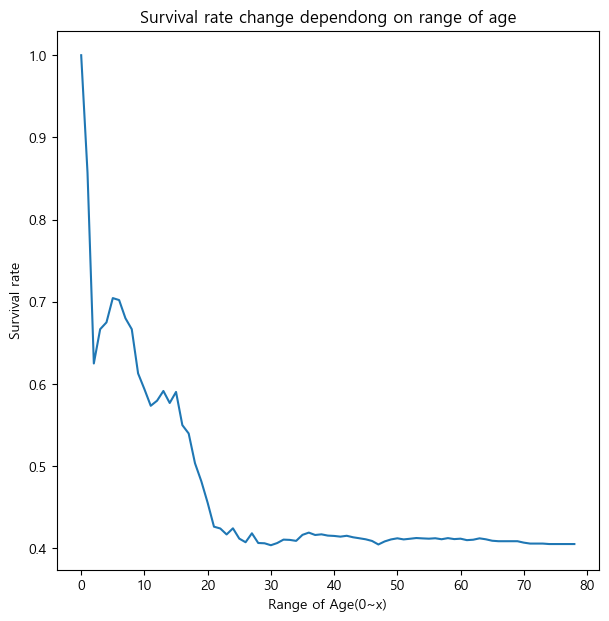

In [ ]:
# 나이대와 생존 확률을 알기 위한 누적 확률 시각화
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

plt.show()

### 판단
* 나이가 어릴수록 생존율이 높이짐

### 객실 등급, 성별, 나이

seaborn의 violinplot을 통해 Sex, Pclass, Age, Survived 등 다양한 데이터를 한눈에 표시

C:\Users\gik_k\AppData\Local\Temp\ipykernel_32556\3115612269.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
C:\Users\gik_k\AppData\Local\Temp\ipykernel_32556\3115612269.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])


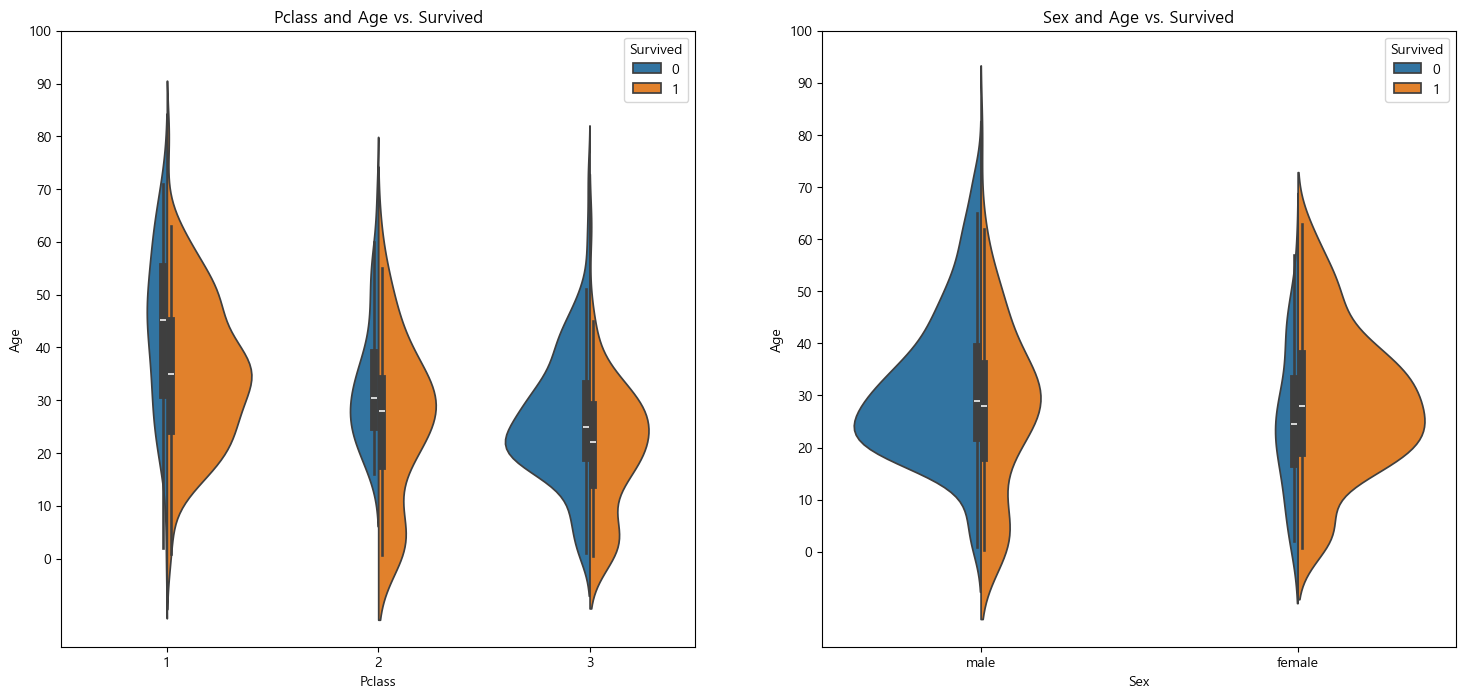

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

#### 판단
* 여성과 아이가 많이 살아남음

### 탑승지

In [58]:
# 탑승한 항구 조회
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked'>

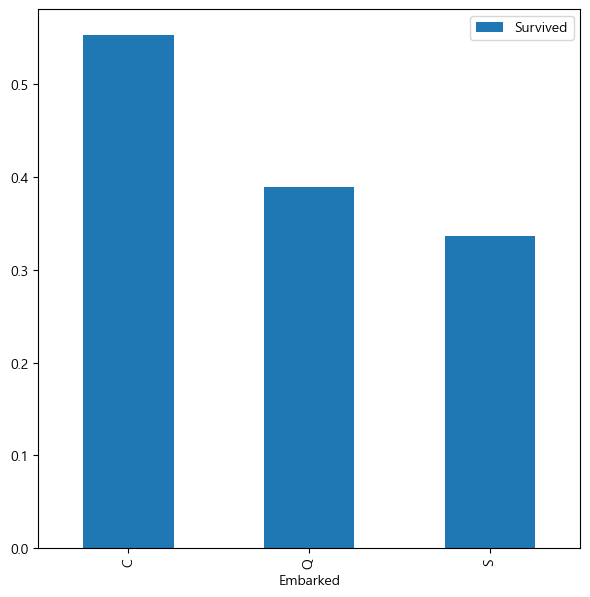

In [59]:
# 탑승 항구 별 생존율
fig, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

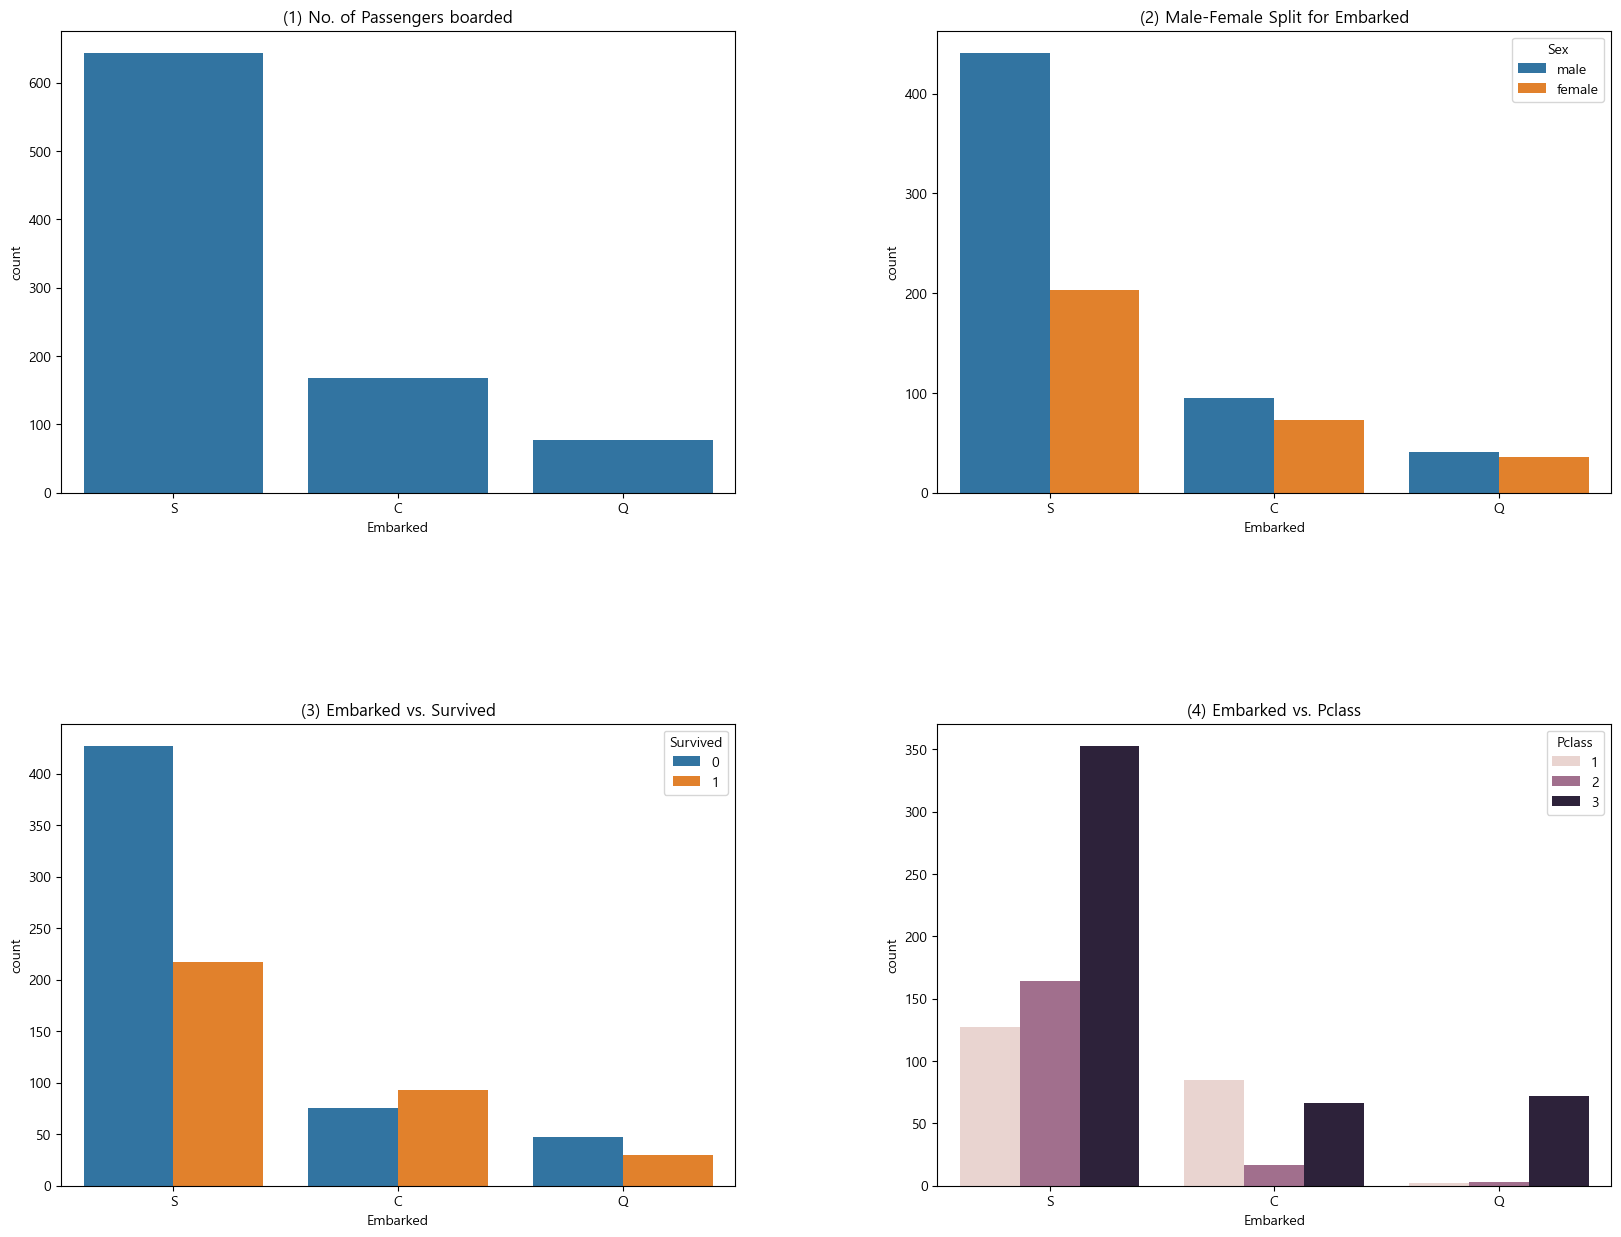

In [64]:
# 탑승 항구(Embarked)와 다른 feature와의 상관관계
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs. Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### SiSp(형제, 자매), Parch(부모, 자녀)

In [65]:
# 두 데이터를 합쳐서 가족수로 표시

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야 하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야 하니 1을 더합니다


In [66]:
print("Maximum size of family: ", df_train['FamilySize'].max())
print("Minimum size of family: ", df_train['FamilySize'].min())

Maximum size of family:  11
Minimum size of family:  1


#### 가족 수와 생존율

[]

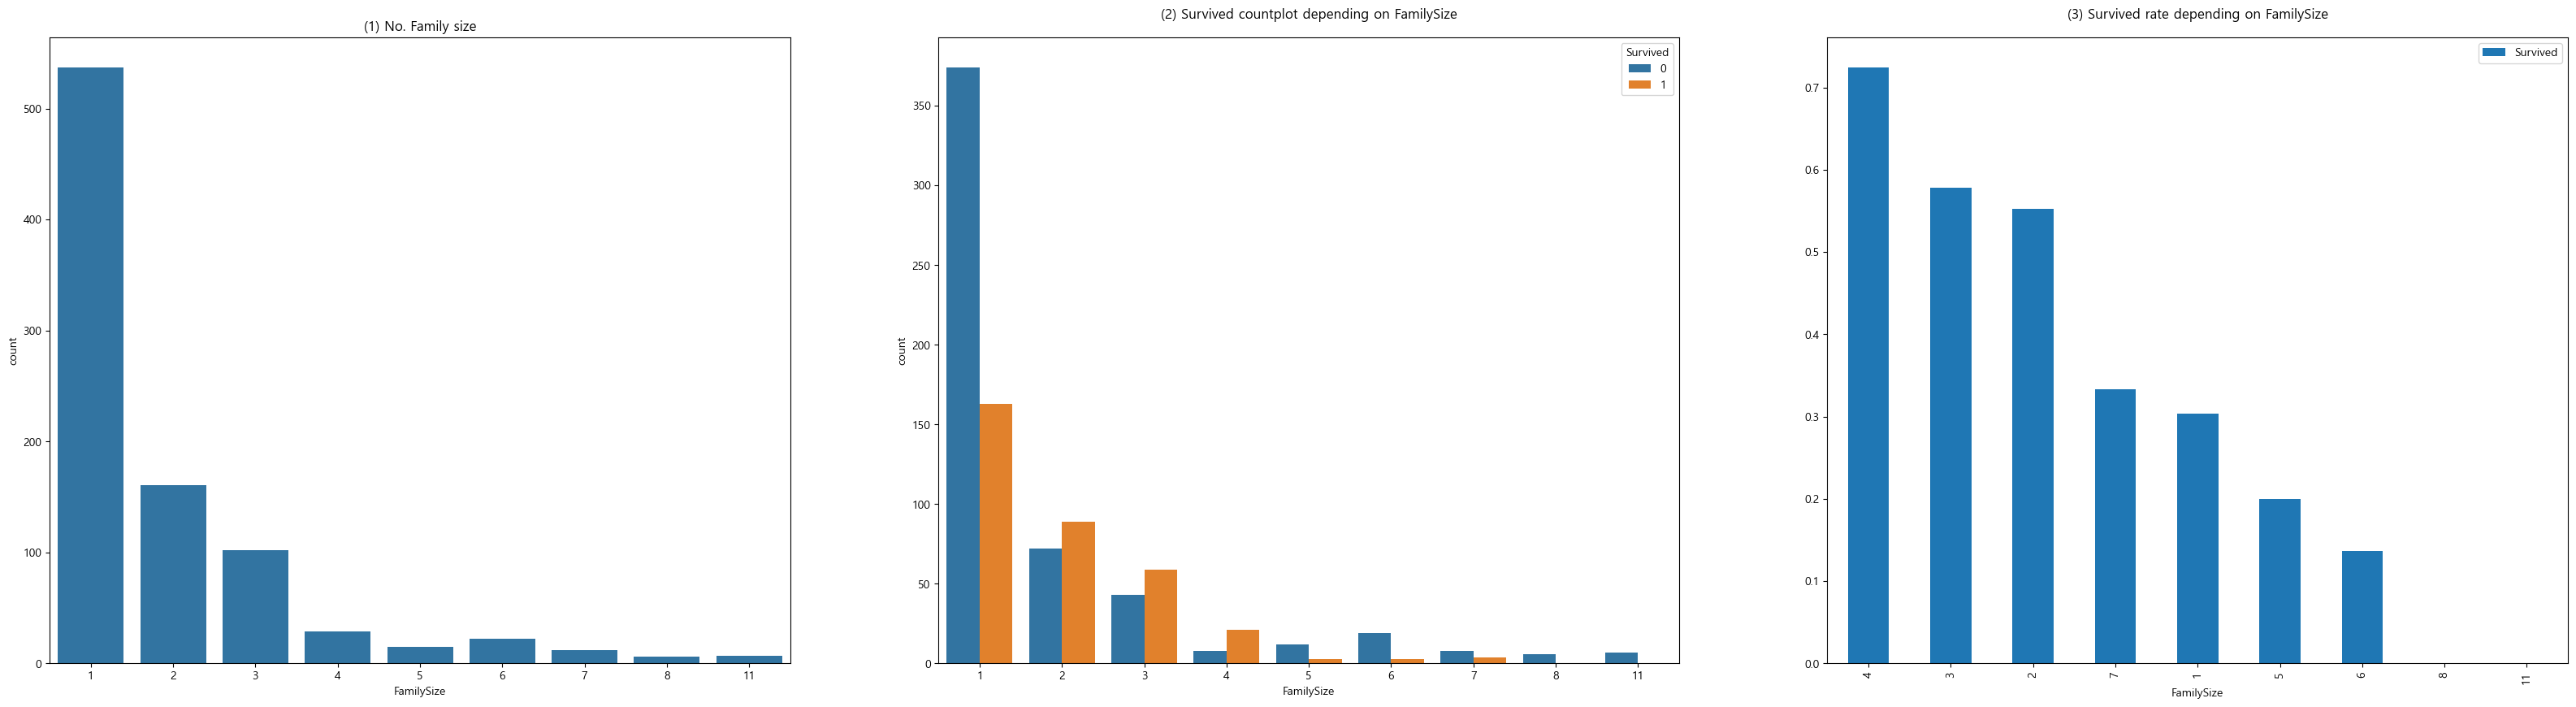

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(40, 10))

# 가족의 크기
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Family size')

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.plot()


#### 판단
* 가족 크기는 1에서 11
* 가족이 4명인 경우가 생존율이 제일 높음
* 3 ~ 4명 선에서 생존 확률이 제일 높음

# 추가로 분석해 볼 것:

https://ucdp.uu.se/downloads/index.html#battlerelated

"UCDP Battle-Related Deaths Dataset version" 데이터셋

* 분쟁이 가장 많이 발생한 지역은?
* 가장 사망자가 많이 발생한 전쟁은?
* 가장 사람이 많이 죽은 지역은?

* 분석 예상 질문: 중국이 대만을 침공했을시 예상되는 사망자수는?